# Linear Regression

This is a [lecture note](http://web.stanford.edu/class/cs20si/lectures/notes_03.pdf) walkthrough from Stanford's [CS 20SI: Tensorflow for Deep Learning Research](http://web.stanford.edu/class/cs20si/syllabus.html).

## Import Dependecies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_context('notebook')
sns.set_style('white')

## Read and Process Data

In [2]:
xls = pd.ExcelFile('../data/chicago.xls')
data = xls.parse()
data.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,6.2,29
1,9.5,44
2,10.5,36
3,7.7,37
4,8.6,53


In [3]:
data = np.array(data, dtype=np.float32)
data.shape

(42, 2)

In [4]:
n_samples = data.shape[0]
n_samples

42

In [5]:
features = data[:,0]
labels = data[:,1]

## Construct Placeholders

In [6]:
X = tf.placeholder(tf.float32, name='X')
y = tf.placeholder(tf.float32, name='y')

## Construct Variables

In [7]:
w_mse = tf.Variable(0.0, name="weights_mse")
b_mse = tf.Variable(0.0, name="bias_mse")
w_huber = tf.Variable(0.0, name="weights_huber")
b_huber = tf.Variable(0.0, name="bias_huber")

## Construct Model to Predict y

### Based on MSE

In [8]:
y_predicted_mse = X * w_mse + b_mse

### Based on Huber loss

$$L_{\delta}(y,f(x)) = \begin{cases}\frac{1}{2}(y-f(x))^{2} & for \;|y-f(x)|\leq\delta\\\delta\;|y-f(x)| - \frac{1}{2}\delta^{2}& otherwise\end{cases}$$

Robust to outliers

Intuition: if the difference between the predicted value and the real value is small,
square it. If it’s large, take its absolute value.

In [9]:
y_predicted_huber = X * w_huber + b_huber

def huber_loss(labels, predictions, delta=1.0):
    residual = tf.abs(predictions - labels)
    condition = tf.less(residual, delta)
    small_res = 0.5 * tf.square(residual)
    large_res = delta * residual - 0.5 * tf.square(delta)
    # {small_res} if {condition} else {large_res}
    return tf.where(condition, small_res, large_res)

## Define Learning Objective

In [10]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
goal_mse = optimizer.minimize(tf.square(y - y_predicted_mse))
goal_huber = optimizer.minimize(huber_loss(y, y_predicted_huber))

## Train

In [11]:
def linear_regression(sess, goal, w, b):
    for i in range(400):
        for pos in range(n_samples):
            x1 = features[pos]
            y1 = labels[pos]
            sess.run(goal, feed_dict={X: x1, y:y1})
    return sess.run([w, b])

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    w_mse_value, b_mse_value = linear_regression(sess, goal_mse, w_mse, b_mse)
    w_huber_value, b_huber_value = linear_regression(sess, goal_huber, w_huber, b_huber)

In [13]:
w_mse_value, b_mse_value

(1.8890244, 5.9190712)

In [14]:
w_huber_value, b_huber_value

(1.7421796, 8.007885)

## Compare

In [15]:
lr_X = np.linspace(1, 40)
lr_y_mse = lr_X * w_mse_value + b_mse_value
lr_y_huber = lr_X * w_huber_value + b_huber_value

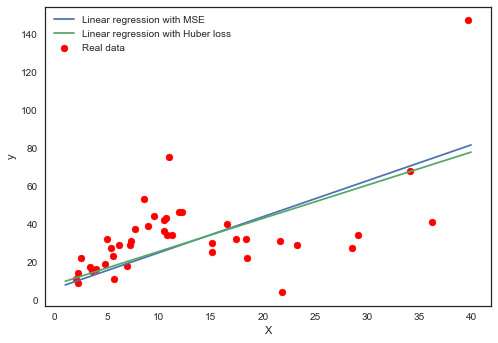

In [16]:
plt.scatter(features, labels, c='r', marker='o', label='Real data')
plt.plot(lr_X, lr_y_mse, label='Linear regression with MSE')
plt.plot(lr_X, lr_y_huber, label='Linear regression with Huber loss')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc=2);

We see that the model uses the huber loss function is affected less by outliers than the one uses MSE.